<a href="https://colab.research.google.com/github/HEMANTHSAINI/colab-project/blob/MASTER/project_119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
dataToUpload = files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import csv
import pandas as pd

columnName = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']
df = pd.read_csv("titanic.csv", names = columnName).iloc[1:]
print(df.head())

  Pclass Sex   Age SibSp Parch Survived
1      3   1  34.5     1     0        0
2      1   0    47     1     0        1
3      3   0    62     0     0        1
4      1   0    27     1     0        1
5      3   1    22     0     0        0


In [4]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']
x = df[features]
y = df.Survived

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

xTrain,xTest,yTrain,yTest = train_test_split(x, y, test_size = 0.3, random_state = 1)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(xTrain, yTrain)

prediction = classifier.predict(xTest)
print("The Accuracy", metrics.accuracy_score(yTest, prediction))

The Accuracy 1.0


In [6]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dotData = StringIO()
export_graphviz(classifier, out_file = dotData, filled = True, rounded = True, feature_names = features, class_names = ['0','1'])
print(dotData.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="Survived <= 0.5\ngini = 0.463\nsamples = 623\nvalue = [396, 227]\nclass = 0", fillcolor="#f4c9aa"] ;
1 [label="gini = 0.0\nsamples = 396\nvalue = [396, 0]\nclass = 0", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 227\nvalue = [0, 227]\nclass = 1", fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


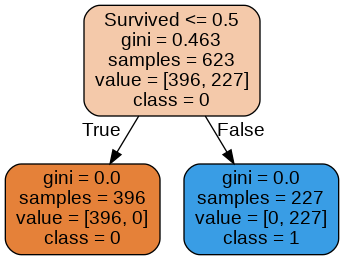

In [7]:
graph = pydotplus.graph_from_dot_data(dotData.getvalue())
graph.write_png("Titanic.png")
Image(graph.create_png())

In [8]:
classifier = DecisionTreeClassifier(max_depth = 3)
classifier = classifier.fit(xTrain, yTrain)
prediction = classifier.predict(xTest)

print("The Accuracy", metrics.accuracy_score(yTest, prediction))

The Accuracy 1.0


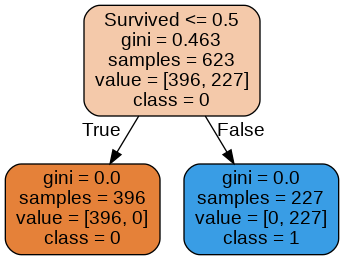

In [9]:
dotData = StringIO()
export_graphviz(classifier, out_file = dotData, filled = True, rounded = True, feature_names = features, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dotData.getvalue())
graph.write_png("Titanic-Updated.png")
Image(graph.create_png())